In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("patient_readmission_data.csv")

# Quick peek
df.head()


,age,gender,diagnosis,length_of_stay,num_previous_admissions,readmitted
0,71,Female,Heart Failure,10,2,No
1,34,Female,Cancer,3,2,No
2,80,Female,Diabetes,18,4,No
3,40,Female,COPD,18,4,No
4,43,Female,Diabetes,17,2,Yes


In [2]:
# Basic Info
print("Shape of the dataset:", df.shape)
print("\nColumn types:")
print(df.dtypes)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Value counts (categorical)
print("\nGender distribution:")
print(df['gender'].value_counts())

print("\nReadmission distribution:")
print(df['readmitted'].value_counts())

print("\nTop diagnoses:")
print(df['diagnosis'].value_counts())


Shape of the dataset: (500, 6)

Column types:
age                         int64
gender                     object
diagnosis                  object
length_of_stay              int64
num_previous_admissions     int64
readmitted                 object
dtype: object

Missing values:
age                        0
gender                     0
diagnosis                  0
length_of_stay             0
num_previous_admissions    0
readmitted                 0
dtype: int64

Gender distribution:
gender
Male      254
Female    246
Name: count, dtype: int64

Readmission distribution:
readmitted
No     342
Yes    158
Name: count, dtype: int64

Top diagnoses:
diagnosis
Diabetes         110
COPD             104
Pneumonia        103
Heart Failure     99
Cancer            84
Name: count, dtype: int64


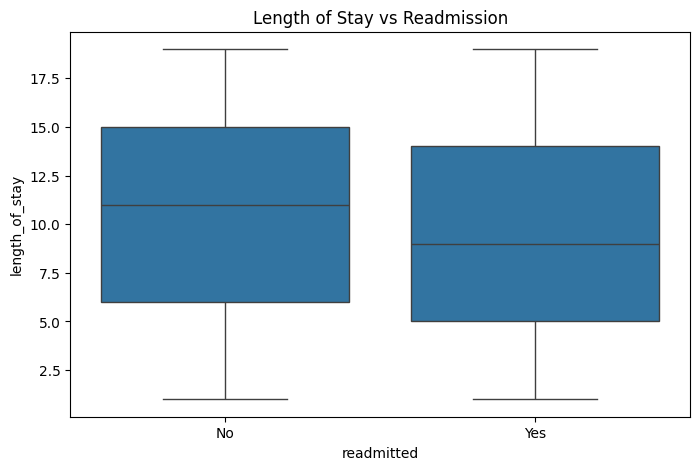

In [2]:
# Summary stats for numerical columns
df.describe()

# Quick check: How does length of stay relate to readmission?
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='readmitted', y='length_of_stay')
plt.title('Length of Stay vs Readmission')
plt.show()


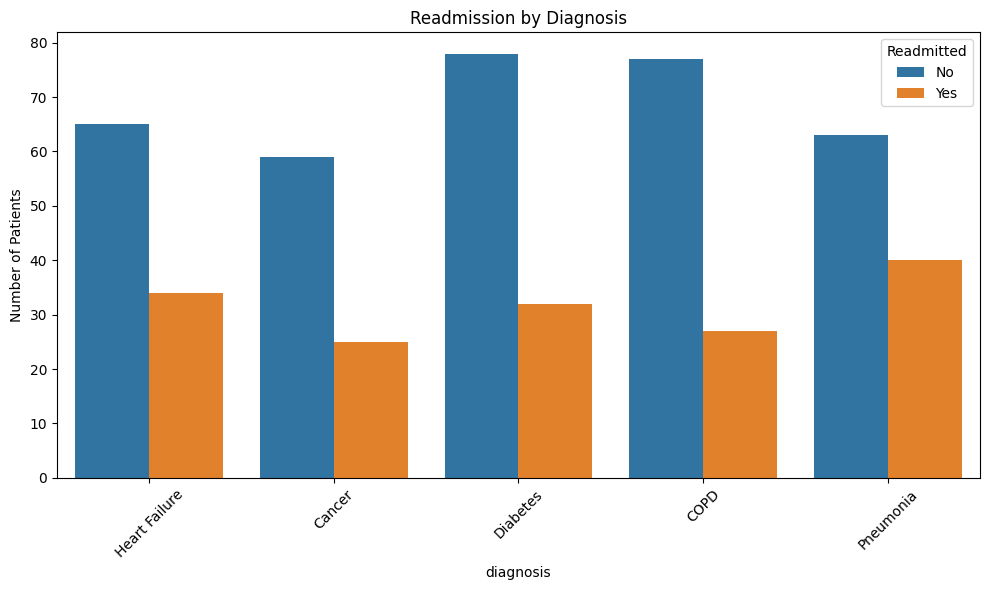

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='diagnosis', hue='readmitted')
plt.title('Readmission by Diagnosis')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.legend(title='Readmitted')
plt.tight_layout()
plt.show()


In [9]:
# Select features and target
X = df[['age', 'gender', 'diagnosis', 'length_of_stay', 'num_previous_admissions']]
y = df['readmitted']


In [10]:
# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=['gender', 'diagnosis'], drop_first=True)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [12]:
y_pred = model.predict(X_test)


In [13]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Optional: Detailed Metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[62  1]
 [37  0]]

Classification Report:
               precision    recall  f1-score   support

          No       0.63      0.98      0.77        63
         Yes       0.00      0.00      0.00        37

    accuracy                           0.62       100
   macro avg       0.31      0.49      0.38       100
weighted avg       0.39      0.62      0.48       100



In [14]:
!pip install imbalanced-learn


In [4]:
from imblearn.over_sampling import SMOTE


In [15]:
# Apply SMOTE only to training data (never test data!)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Let’s check the new balance
print("Original y_train:\n", y_train.value_counts())
print("\nBalanced y_train:\n", y_train_balanced.value_counts())


Original y_train:
 readmitted
No     279
Yes    121
Name: count, dtype: int64

Balanced y_train:
 readmitted
No     279
Yes    279
Name: count, dtype: int64


In [16]:
model_balanced = LogisticRegression(max_iter=1000)
model_balanced.fit(X_train_balanced, y_train_balanced)


LogisticRegression(max_iter=1000)

In [17]:
y_pred_balanced = model_balanced.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

cm_bal = confusion_matrix(y_test, y_pred_balanced)
print("Confusion Matrix (Balanced):\n", cm_bal)

print("\nClassification Report:\n", classification_report(y_test, y_pred_balanced))


Confusion Matrix (Balanced):
 [[38 25]
 [21 16]]

Classification Report:
               precision    recall  f1-score   support

          No       0.64      0.60      0.62        63
         Yes       0.39      0.43      0.41        37

    accuracy                           0.54       100
   macro avg       0.52      0.52      0.52       100
weighted avg       0.55      0.54      0.54       100



In [18]:
X_small = df[['length_of_stay', 'num_previous_admissions']]
y_small = df['readmitted']


In [20]:
from sklearn.model_selection import train_test_split

X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(
    X_small, y_small, test_size=0.2, random_state=42)


In [21]:
from sklearn.linear_model import LogisticRegression

model_mini = LogisticRegression(max_iter=1000)
model_mini.fit(X_train_small, y_train_small)

LogisticRegression(max_iter=1000)

In [22]:
y_pred_small = model_mini.predict(X_test_small)


In [23]:
from sklearn.metrics import confusion_matrix, classification_report

cm_small = confusion_matrix(y_test_small, y_pred_small)
print("Confusion Matrix:\n", cm_small)

print("\nClassification Report:\n", classification_report(y_test_small, y_pred_small))


Confusion Matrix:
 [[63  0]
 [37  0]]

Classification Report:
               precision    recall  f1-score   support

          No       0.63      1.00      0.77        63
         Yes       0.00      0.00      0.00        37

    accuracy                           0.63       100
   macro avg       0.32      0.50      0.39       100
weighted avg       0.40      0.63      0.49       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
df ['diagnosis'].unique()

array(['Heart Failure', 'Cancer', 'Diabetes', 'COPD', 'Pneumonia'],
      dtype=object)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[62  1]
 [37  0]]

Classification Report:
               precision    recall  f1-score   support

          No       0.63      0.98      0.77        63
         Yes       0.00      0.00      0.00        37

    accuracy                           0.62       100
   macro avg       0.31      0.49      0.38       100
weighted avg       0.39      0.62      0.48       100



In [26]:
!pip install imbalanced-learn


In [27]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)


In [28]:
model_log_smote = LogisticRegression(max_iter=1000)
model_log_smote.fit(X_train_smote, y_train_smote)


LogisticRegression(max_iter=1000)

In [29]:
y_pred_smote = model_log_smote.predict(X_test)



In [30]:
print("Confusion Matrix (Balanced):")
print(confusion_matrix(y_test, y_pred_smote))

print("\nClassification Report (Balanced):")
print(classification_report(y_test, y_pred_smote))


Confusion Matrix (Balanced):
[[38 25]
 [21 16]]

Classification Report (Balanced):
              precision    recall  f1-score   support

          No       0.64      0.60      0.62        63
         Yes       0.39      0.43      0.41        37

    accuracy                           0.54       100
   macro avg       0.52      0.52      0.52       100
weighted avg       0.55      0.54      0.54       100

